In [13]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
training_data_dir = './experiment_data/'

dataframes = []

for filename in os.listdir(training_data_dir):
    if filename.endswith('.csv'):
        # extract info from the file name
        parts = filename.split('_')
        num_riffle_passes = int(parts[1].replace('rp', ''))
        num_layers = int(parts[2].replace('l', ''))

        # Read the CSV file into a DataFrame
        file_path = os.path.join(training_data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Add the new columns
        df['num_riffle_passes'] = num_riffle_passes
        df['num_layers'] = num_layers
        
        # Append to the list
        dataframes.append(df)

# Concatenate all the DataFrames into one
big_df = pd.concat(dataframes, ignore_index=True)


In [15]:
big_df

,epoch,avg_train_loss,avg_valid_loss,valid_accuracy,precision,recall,elapsed_time,num_riffle_passes,num_layers
0,0,0.3373,0.3238,89.32,0.0000,0.0000,81.34,2,2
1,1,0.3054,0.2783,91.73,0.9513,0.2378,120.88,2,2
2,2,0.2812,0.2724,91.88,0.9812,0.2444,129.47,2,2
3,3,0.2782,0.2719,91.92,0.9610,0.2537,90.43,2,2
4,4,0.2757,0.2717,91.87,0.9670,0.2472,123.42,2,2
...,...,...,...,...,...,...,...,...,...
435,10,0.2794,0.2731,91.85,0.9961,0.2407,125.94,3,2
436,11,0.2791,0.2732,91.82,0.9774,0.2425,84.36,3,2
437,12,0.2787,0.2732,91.87,1.0000,0.2416,116.37,3,2
438,13,0.2787,0.2733,91.84,0.9923,0.2407,123.22,3,2


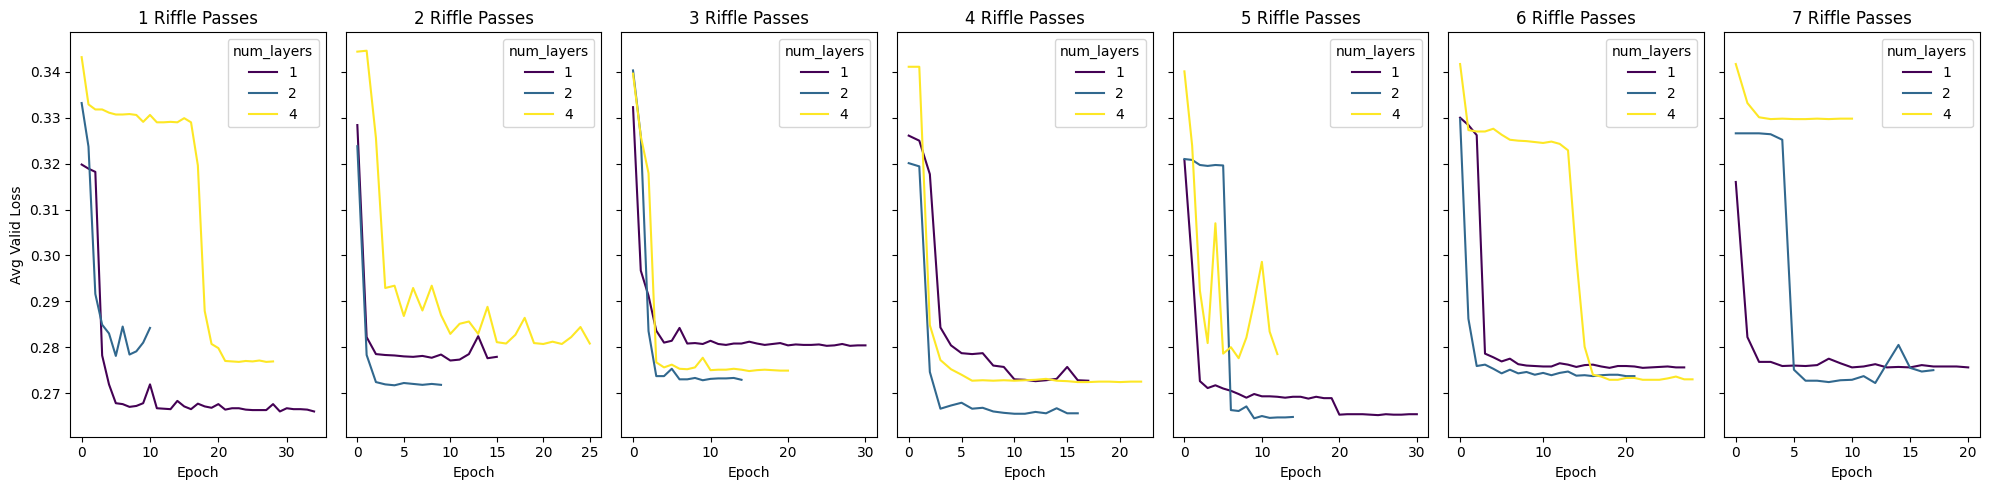

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `big_df` is the concatenated DataFrame

# Set up the figure with 7 subplots side by side
unique_riffle_passes = sorted(big_df['num_riffle_passes'].unique())
fig, axes = plt.subplots(1, len(unique_riffle_passes), figsize=(20, 5), sharey=True)

# Iterate over each unique value of num_riffle_passes
for i, num_riffle_pass in enumerate(unique_riffle_passes):
    # Filter the DataFrame for the current num_riffle_pass
    subset = big_df[big_df['num_riffle_passes'] == num_riffle_pass]
    subset = subset[subset['epoch'] < 100]
    
    # Plot the data using seaborn lineplot
    sns.lineplot(
        data=subset,
        x="epoch",
        y="avg_valid_loss",
        hue="num_layers",
        ax=axes[i],
        palette="viridis",
    )
    
    # Set titles and labels
    axes[i].set_title(f"{num_riffle_pass} Riffle Passes")
    axes[i].set_xlabel("Epoch")
    if i == 0:
        axes[i].set_ylabel("Avg Valid Loss")
    else:
        axes[i].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# save the figure
fig.savefig('avg_valid_loss_by_num_riffle_passes.png')


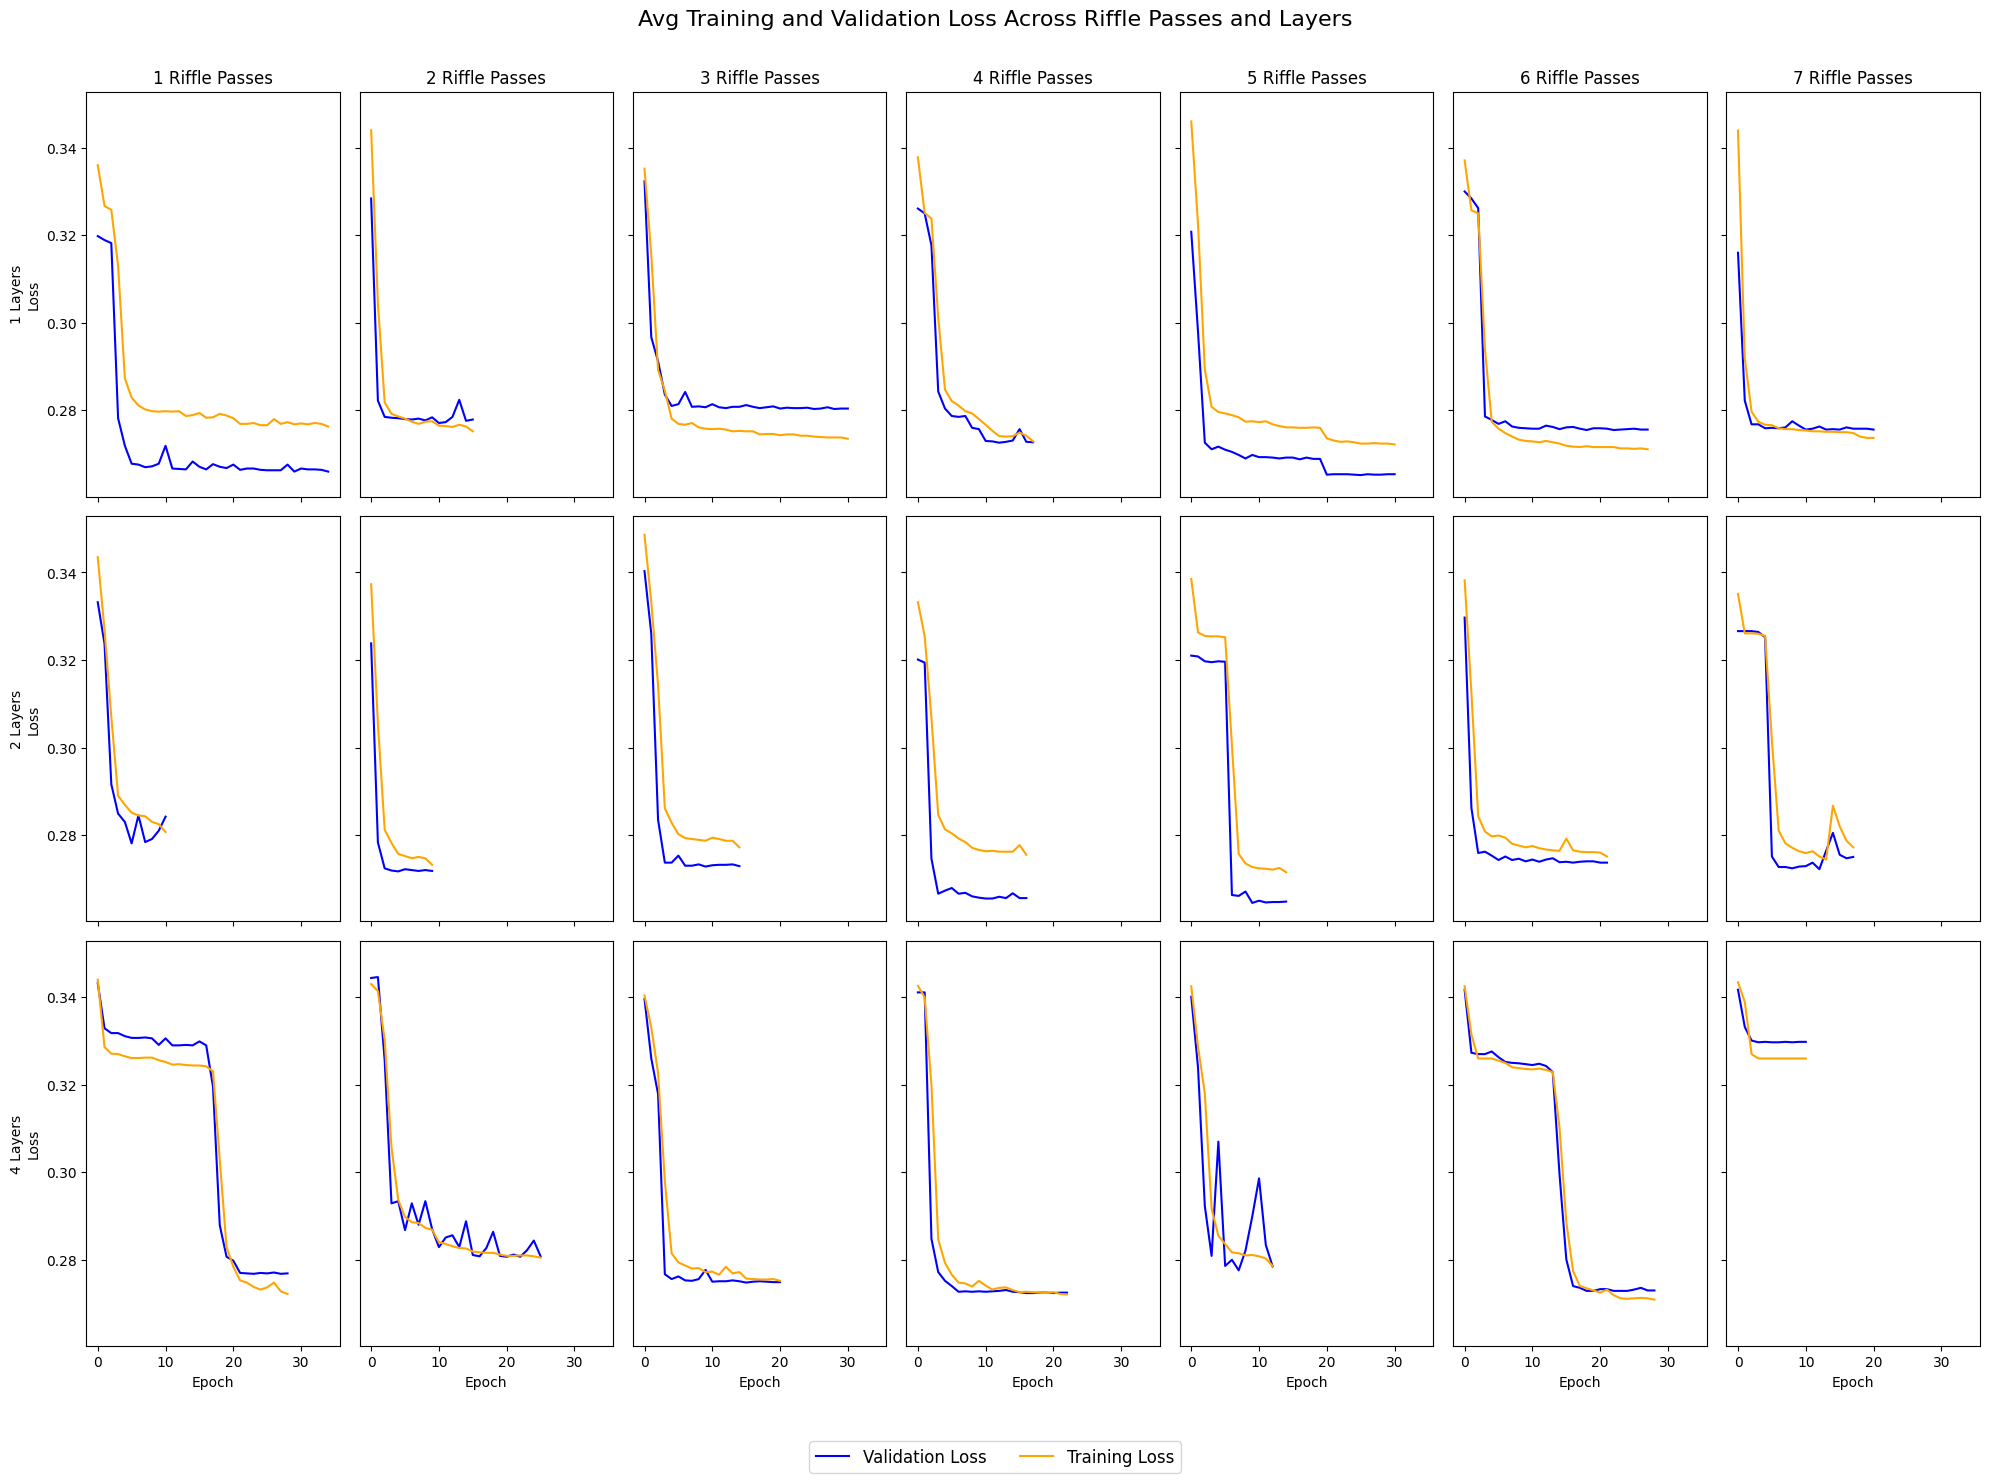

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique values for riffle passes and layers
unique_riffle_passes = sorted(big_df['num_riffle_passes'].unique())
unique_layers = sorted(big_df['num_layers'].unique())

# Create a grid of subplots
fig, axes = plt.subplots(len(unique_layers), len(unique_riffle_passes), figsize=(20, 15), sharex=True, sharey=True)

# Iterate through each layer and riffle pass to create the grid
for row_idx, num_layer in enumerate(unique_layers):
    for col_idx, num_riffle_pass in enumerate(unique_riffle_passes):
        # Filter the data for the current layer and riffle pass
        subset = big_df[(big_df['num_layers'] == num_layer) & (big_df['num_riffle_passes'] == num_riffle_pass)]
        
        # Get the current subplot
        ax = axes[row_idx, col_idx]
        
        # Plot avg_valid_loss and avg_training_loss
        sns.lineplot(data=subset, x="epoch", y="avg_valid_loss", ax=ax, label="Validation Loss", color="blue")
        sns.lineplot(data=subset, x="epoch", y="avg_train_loss", ax=ax, label="Training Loss", color="orange")
        
        # Titles and labels
        if row_idx == 0:
            ax.set_title(f"{num_riffle_pass} Riffle Passes")
        if col_idx == 0:
            ax.set_ylabel(f"{num_layer} Layers\nLoss")
        if row_idx == len(unique_layers) - 1:
            ax.set_xlabel("Epoch")
        
        ax.legend().set_visible(False)

# Add legend to the bottom
handles, labels = axes[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle("Avg Training and Validation Loss Across Riffle Passes and Layers", fontsize=16)
plt.show()

# save the figure
fig.savefig('avg_valid_loss_and_avg_train_loss_by_num_riffle_passes.png')


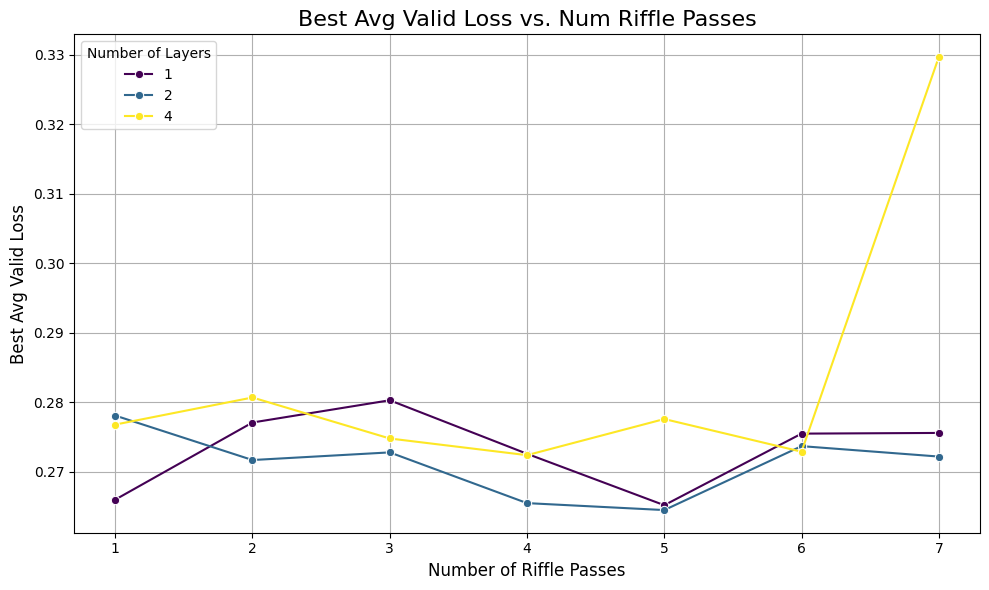

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `big_df` is the concatenated DataFrame

# Calculate the best (lowest) avg_valid_loss for each combination of num_riffle_passes and num_layers
best_losses = (
    big_df.groupby(['num_riffle_passes', 'num_layers'])['avg_valid_loss']
    .min()
    .reset_index()
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_losses,
    x="num_riffle_passes",
    y="avg_valid_loss",
    hue="num_layers",
    marker="o",
    palette="viridis",
)

# Customize the plot
plt.title("Best Avg Valid Loss vs. Num Riffle Passes", fontsize=16)
plt.xlabel("Number of Riffle Passes", fontsize=12)
plt.ylabel("Best Avg Valid Loss", fontsize=12)
plt.legend(title="Number of Layers", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


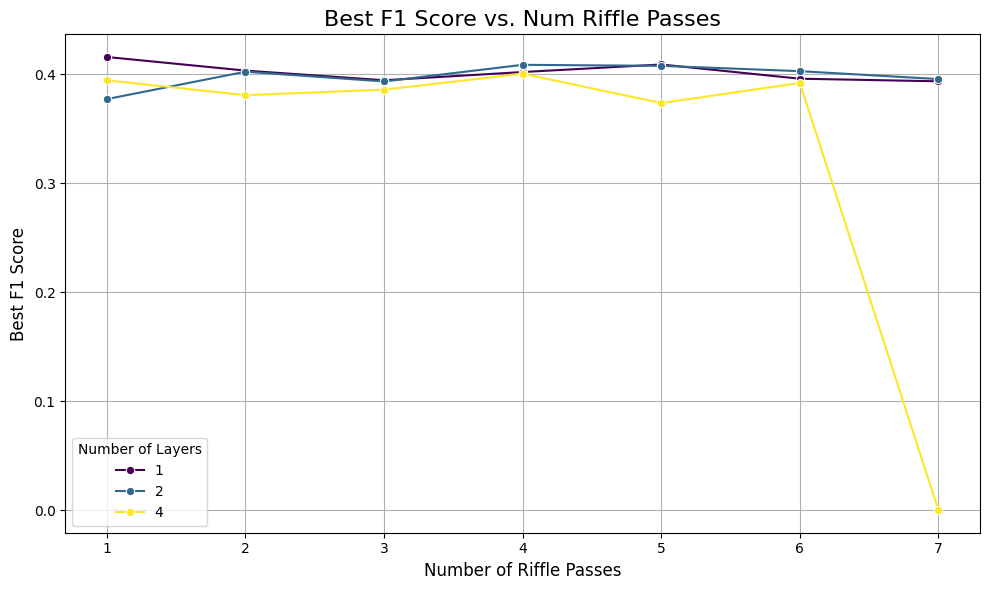

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `big_df` is the combined DataFrame from your earlier concatenation step

# Calculate the F1 score
big_df['f1_score'] = 2 * (big_df['precision'] * big_df['recall']) / (big_df['precision'] + big_df['recall'])
big_df['f1_score'] = big_df['f1_score'].fillna(0)  # Handle division by zero

# Calculate the best (highest) F1 score for each combination of num_riffle_passes and num_layers
best_f1_scores = (
    big_df.groupby(['num_riffle_passes', 'num_layers'])['f1_score']
    .max()
    .reset_index()
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_f1_scores,
    x="num_riffle_passes",
    y="f1_score",
    hue="num_layers",
    marker="o",
    palette="viridis",
)

# Customize the plot
plt.title("Best F1 Score vs. Num Riffle Passes", fontsize=16)
plt.xlabel("Number of Riffle Passes", fontsize=12)
plt.ylabel("Best F1 Score", fontsize=12)
plt.legend(title="Number of Layers", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
# Find the best model for each num_riffle_passes, show the entire row
best_models = big_df.groupby('num_riffle_passes').apply(lambda x: x.loc[x['avg_valid_loss'].idxmin()]).reset_index(drop=True)
best_models

/var/folders/_f/6rbnz97j6m33t46nlym4lc780000gn/T/ipykernel_11356/1443705074.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_models = big_df.groupby('num_riffle_passes').apply(lambda x: x.loc[x['avg_valid_loss'].idxmin()]).reset_index(drop=True)


,epoch,avg_train_loss,avg_valid_loss,valid_accuracy,precision,recall,elapsed_time,num_riffle_passes,num_layers,f1_score
0,29.0,0.2768,0.2660,92.10,0.9745,0.2550,10.25,1.0,1.0,0.404225
1,4.0,0.2757,0.2717,91.87,0.9670,0.2472,123.42,2.0,2.0,0.393745
2,9.0,0.2787,0.2728,91.83,0.9885,0.2407,117.76,3.0,2.0,0.387133
3,10.0,0.2763,0.2655,92.11,0.9674,0.2550,113.53,4.0,2.0,0.403611
4,9.0,0.2727,0.2645,92.12,0.9606,0.2565,108.50,5.0,2.0,0.404887
5,18.0,0.2735,0.2729,91.82,0.9887,0.2433,36.56,6.0,4.0,0.390504
6,12.0,0.2751,0.2722,91.87,0.9962,0.2461,112.10,7.0,2.0,0.394695
